In [1]:
import util.preprocessing as preprocessing
import util.detection_util as detection_util

import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import os

import metadataextractor
import util.config as config

from matplotlib import pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


In [2]:
pre = preprocessing.Preprocessing()
detect = detection_util.DetectionUtil()
img_dic = pre.readImages()

print (len(img_dic))

df = pd.DataFrame(columns=['id', 'imageName', 'type', 'fsize', 'pigname', 'setversion', 'createdate', 'img_width',
                           'img_height', 'sharpness', 'flash', 'bright', 'contrast', 'sex', 'weight', 'age'])
i = 0


df['fsize'].apply(pd.to_numeric)

2021-03-19 13:14:32,806 - util.preprocessing - INFO - init Preprocessing
2021-03-19 13:14:32,810 - util.detection_util - INFO - init DetectionUtil
2021-03-19 13:14:32,811 - util.preprocessing - INFO - readImages
2021-03-19 13:14:32,812 - util.preprocessing - INFO - image_dir: D:\Users\avatar\OneDrive - Hochschule Luzern\bearbeitet_mit_label\train
30


Series([], Name: fsize, dtype: object)

In [3]:
def showOpenCvImage(img_before, img_after):
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB))
    plt.show()

In [4]:
for key in img_dic:
    img = img_dic[key]
    img_with_path = os.path.join(config.image_train_dir_path, key)
    size = os.stat(img_with_path).st_size
    pig_name = detect.getPigName(key)
    set_version = detect.getSetVersion(key)
    meta = metadataextractor.MetadataExtractor(img_with_path)
    create_date = meta.getCreateDate()
    img_width = meta.getImageWidth()
    img_height = meta.getImageHeight()
    flash = meta.getFlashMode()
    shrp = pre.computeSharpness(img)
    bright = pre.getBrightness(img)
    contrast = pre.getContrast(img)
    sex = 1
    age = 90
    weight = 100

    df.loc[str(i),:] = [i, key, 'jpg', size, pig_name, set_version, create_date, img_width, img_height, shrp, flash,
                        bright, contrast, sex, weight, age]
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    i = i + 1

In [30]:
print(df.head().to_string())

  id             imageName type    fsize pigname setversion           createdate img_width img_height  sharpness flash     bright contrast sex weight age
0  0  DSC_V1_6460_2238.JPG  jpg  3353694    6460         V1  2021:02:02 07:01:27      4288       2848  31.764733   [7]  65.875988      1.0   1    100  90
1  1  DSC_V1_6460_2239.JPG  jpg  3825659    6460         V1  2021:02:02 07:01:34      4288       2848  47.600315   [7]  69.409149      1.0   1    100  90
2  2  DSC_V1_6460_2240.JPG  jpg  3896251    6460         V1  2021:02:02 07:01:35      4288       2848  58.129255   [7]   62.00701      1.0   1    100  90
3  3  DSC_V1_6460_2241.JPG  jpg  4461545    6460         V1  2021:02:02 07:02:10      4288       2848  25.567715   [7]  73.423721      1.0   1    100  90
4  4  DSC_V1_6460_2242.JPG  jpg  3399326    6460         V1  2021:02:02 07:02:11      4288       2848   9.974902   [7]  46.560429      1.0   1    100  90


In [31]:
df = df.astype({'id': 'int', 'imageName': 'str', 'type': 'str'})
df['fsize'] = pd.to_numeric(df["fsize"])
df['sharpness'] = pd.to_numeric(df["sharpness"])
df['sharpness'] = df['sharpness'].astype(int) 

df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          30 non-null     int32 
 1   imageName   30 non-null     object
 2   type        30 non-null     object
 3   fsize       30 non-null     int64 
 4   pigname     30 non-null     object
 5   setversion  30 non-null     object
 6   createdate  30 non-null     object
 7   img_width   30 non-null     object
 8   img_height  30 non-null     object
 9   sharpness   30 non-null     int32 
 10  flash       30 non-null     object
 11  bright      30 non-null     object
 12  contrast    30 non-null     object
 13  sex         30 non-null     object
 14  weight      30 non-null     object
 15  age         30 non-null     object
dtypes: int32(2), int64(1), object(13)
memory usage: 4.8+ KB


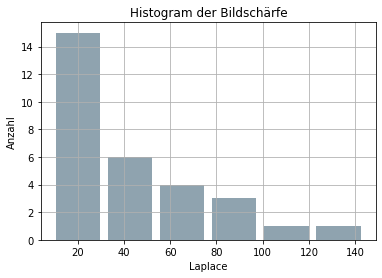

In [32]:
import matplotlib.pyplot as plt
df['sharpness'].hist(bins='auto',color='#607c8e',alpha=0.7, rwidth=0.85)
plt.title('Histogram der Bildschärfe')
plt.xlabel('Laplace')
plt.ylabel('Anzahl')
plt.show()

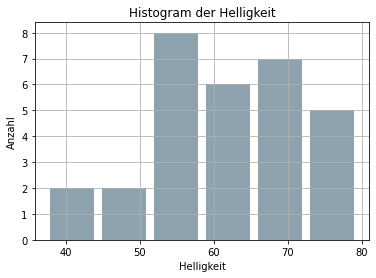

In [33]:
df['bright'].hist(bins='auto',color='#607c8e',alpha=0.7, rwidth=0.85)
plt.title('Histogram der Helligkeit')
plt.xlabel('Helligkeit')
plt.ylabel('Anzahl')
plt.show()

In [18]:
df[{'id','imageName','sharpness', 'bright'}]

,id,sharpness,imageName,bright
0,0,31,DSC_V1_6460_2238.JPG,65.875988
1,1,47,DSC_V1_6460_2239.JPG,69.409149
2,2,58,DSC_V1_6460_2240.JPG,62.00701
3,3,25,DSC_V1_6460_2241.JPG,73.423721
4,4,9,DSC_V1_6460_2242.JPG,46.560429
5,5,10,DSC_V1_6460_2243.JPG,54.23428
6,6,13,DSC_V1_6460_2244.JPG,59.624849
7,7,20,DSC_V1_6460_2245.JPG,63.911885
8,8,42,DSC_V1_6460_2247.JPG,40.551423
9,9,116,DSC_V1_6471_2478.JPG,56.361857
